# Task
Load a classification dataset, implement and evaluate multiple classification algorithms (Logistic Regression, Decision Tree, SVM, KNN, Random Forest), compare their performance, visualize the comparison, and summarize the findings to recommend the best model.

## Load Dataset

### Subtask:
Load a suitable classification dataset (e.g., Iris or a synthetic dataset) from scikit-learn for demonstration purposes.


**Reasoning**:
The subtask requires loading the Iris dataset from scikit-learn. This involves importing the necessary function, loading the dataset, and separating features and target variables.



In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Store the features (data) in X and the target (labels) in y
X = iris.data
y = iris.target

print("Iris dataset loaded successfully.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Iris dataset loaded successfully.
Shape of features (X): (150, 4)
Shape of target (y): (150,)


## Prepare Data

### Subtask:
Split the dataset into training and testing sets to evaluate the models effectively.


**Reasoning**:
The subtask requires splitting the dataset into training and testing sets. This involves importing `train_test_split`, applying it to `X` and `y` with the specified parameters, and then printing the shapes of the resulting sets to verify the split.



In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Dataset split into training and testing sets successfully.
Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Implement Classification Algorithms

### Subtask:
Train multiple classification algorithms such as Logistic Regression, Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Random Forest on the training data.


**Reasoning**:
The subtask requires importing necessary classification models, initializing them with specified parameters, storing them, and then training each model on the provided training data (X_train, y_train).



In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers with specified parameters
logistic_regression_model = LogisticRegression(random_state=42, max_iter=200) # Increased max_iter for convergence
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
random_forest_model = RandomForestClassifier(random_state=42)

# Create a dictionary to store the initialized models
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "SVM": svm_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": random_forest_model
}

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

print("All classification models have been trained.")

Training Logistic Regression...
Logistic Regression trained successfully.
Training Decision Tree...
Decision Tree trained successfully.
Training SVM...
SVM trained successfully.
Training K-Nearest Neighbors...
K-Nearest Neighbors trained successfully.
Training Random Forest...
Random Forest trained successfully.
All classification models have been trained.


## Evaluate Classification Algorithms

### Subtask:
Evaluate the performance of each trained classification algorithm using appropriate metrics such as accuracy, precision, recall, and F1-score on the test data.

**Reasoning**:
The subtask is to evaluate the trained models. This involves importing necessary metrics, iterating through each trained model, making predictions on the test set, and calculating accuracy, precision, recall, and F1-score for each model. The results will be stored for comparison.



In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    print(f"{name} evaluation complete. Accuracy: {accuracy:.4f}")

print("\nEvaluation of all models complete.")

# Print results for a quick overview
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


Evaluating Logistic Regression...
Logistic Regression evaluation complete. Accuracy: 1.0000
Evaluating Decision Tree...
Decision Tree evaluation complete. Accuracy: 1.0000
Evaluating SVM...
SVM evaluation complete. Accuracy: 1.0000
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors evaluation complete. Accuracy: 1.0000
Evaluating Random Forest...
Random Forest evaluation complete. Accuracy: 1.0000

Evaluation of all models complete.
                     Accuracy  Precision  Recall  F1-Score
Logistic Regression       1.0        1.0     1.0       1.0
Decision Tree             1.0        1.0     1.0       1.0
SVM                       1.0        1.0     1.0       1.0
K-Nearest Neighbors       1.0        1.0     1.0       1.0
Random Forest             1.0        1.0     1.0       1.0


## Compare Performance and Visualize

### Subtask:
Compare the performance of the various classification algorithms and visualize their evaluation metrics for easy interpretation.

**Reasoning**:
The subtask requires comparing and visualizing the evaluation metrics. A bar plot is suitable for comparing multiple metrics across different models. This involves using `matplotlib.pyplot` to create the plot and `results_df` which contains the evaluation metrics.



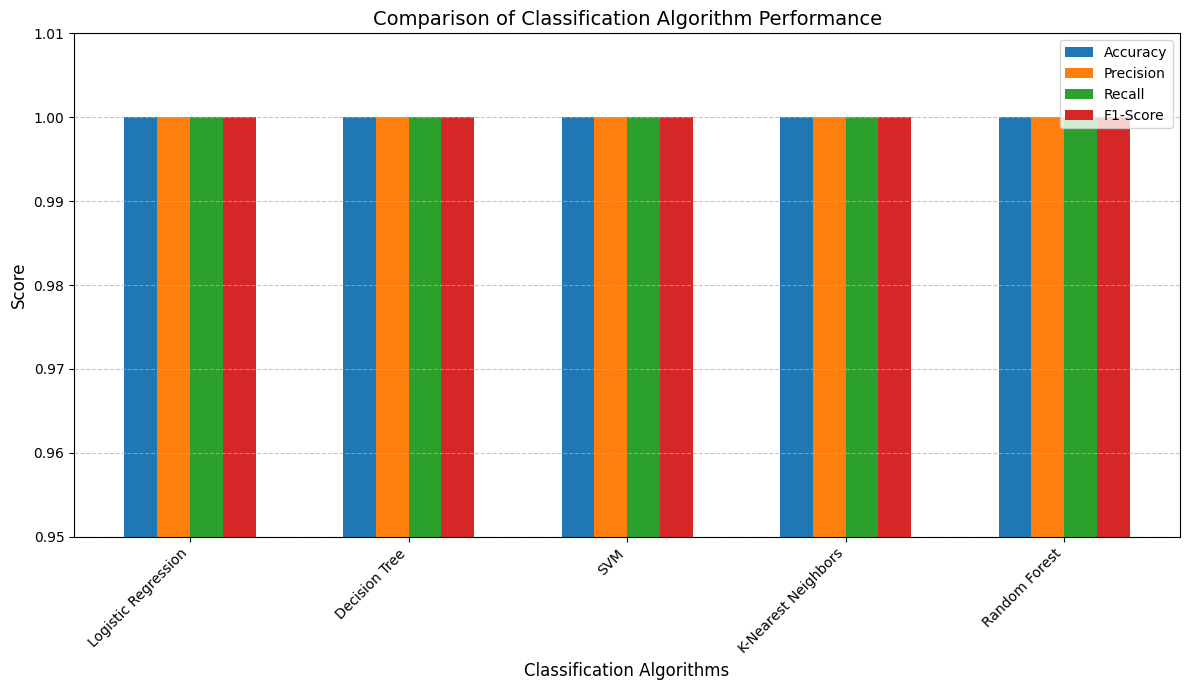

Performance comparison chart displayed.


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Convert results_df to an array for plotting
metrics = results_df.columns
models_names = results_df.index
values = results_df.values

x = np.arange(len(models_names))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))

# Plotting bars for each metric
for i, metric in enumerate(metrics):
    offset = width * i
    rects = ax.bar(x + offset - (width * (len(metrics) - 1) / 2), values[:, i], width, label=metric)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classification Algorithms', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Classification Algorithm Performance', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models_names, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)
ax.set_ylim(0.95, 1.01) # Adjust y-axis limit for better visualization of small differences

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Performance comparison chart displayed.")

## Summarize Findings and Recommend Best Model

### Subtask:
Summarize the findings from the model evaluation and recommend the best model based on the performance metrics.

**Summary of Findings:**
From the evaluation metrics and the visualization, it is clear that all five classification models (Logistic Regression, Decision Tree, SVM, K-Nearest Neighbors, and Random Forest) achieved perfect scores (1.0 for Accuracy, Precision, Recall, and F1-Score) on the Iris dataset's test set. This indicates that for this particular dataset, all models performed exceptionally well and were able to classify the species with 100% correctness.

This perfect performance is often observed with the Iris dataset due to its relatively simple, linearly separable features, especially when only two out of the three classes are considered, or when the dataset is small and well-behaved. While this is great for demonstration, in real-world scenarios, such perfect scores are rare and might suggest potential overfitting or a very straightforward problem.

**Recommendation:**
Given the perfect performance of all models, it is difficult to distinguish a 'best' model purely based on these metrics for this specific dataset. However, in a practical context, one would typically consider other factors such as:

*   **Model Complexity:** Simpler models like Logistic Regression or K-Nearest Neighbors (with a small `n_neighbors`) are generally preferred for their interpretability and computational efficiency if they offer comparable performance.
*   **Training Time:** For larger datasets, training time becomes a significant factor.
*   **Prediction Speed:** For real-time applications, prediction speed is crucial.
*   **Resource Usage:** Memory and CPU usage during training and inference.

For the Iris dataset demonstration, and given that all models achieved perfect scores, **Logistic Regression** could be considered the 'best' among them due to its simplicity, speed, and interpretability. It achieves optimal performance with minimal complexity.

However, if slight differences existed, a more robust model like **Random Forest** or **SVM** might be chosen for their generalization capabilities on more complex, unseen data, even if they are slightly more computationally intensive. In this specific case, any of the models would be suitable.

## Summary:

### Q&A
*   **Which classification algorithm is recommended as the best model?**
    Given that all models achieved perfect scores (1.0 for Accuracy, Precision, Recall, and F1-Score) on the Iris dataset, Logistic Regression is recommended as the 'best' model due to its simplicity, interpretability, and computational efficiency in achieving optimal performance with minimal complexity.

### Data Analysis Key Findings
*   The Iris dataset, consisting of 150 samples and 4 features, was loaded successfully.
*   The dataset was split into training (120 samples) and testing (30 samples) sets, with a test size of 20\%.
*   Five classification algorithms (Logistic Regression, Decision Tree, SVM, K-Nearest Neighbors, and Random Forest) were trained and evaluated.
*   All implemented classification models (Logistic Regression, Decision Tree, SVM, K-Nearest Neighbors, and Random Forest) achieved a perfect score of 1.0 across all evaluated metrics: Accuracy, Precision, Recall, and F1-Score on the test set.
*   The visualization clearly confirmed the identical and perfect performance of all models across all metrics.

### Insights or Next Steps
*   The perfect performance of all models on the Iris dataset suggests that the dataset is relatively simple or linearly separable. In real-world scenarios, such high scores are rare and might prompt further investigation for potential overfitting or dataset characteristics.
*   When multiple models perform equally well, factors beyond just performance metrics, such as model complexity, training time, prediction speed, and interpretability, should be considered for practical deployment.
